In [ ]:
import pandas as pd
import numpy as np
import string
import csv

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score



In [ ]:
pip install neattext


In [ ]:
pip install eli5

In [ ]:
import neattext.functions as nfx

In [ ]:
df=pd.read_csv("/content/train.txt")
df.columns=['Text','Emotion']

In [ ]:
df.head()

,Text,Emotion
0,i can go from feeling so hopeless to so damned...,sadness
1,im grabbing a minute to post i feel greedy wrong,anger
2,i am ever feeling nostalgic about the fireplac...,love
3,i am feeling grouchy,anger
4,ive been feeling a little burdened lately wasn...,sadness


In [ ]:
df.shape

(15999, 2)

In [ ]:
df.dtypes

Text       object
Emotion    object
dtype: object

In [ ]:
df.isnull().sum()

Text       0
Emotion    0
dtype: int64

In [ ]:
df['Emotion'].value_counts()

joy         5362
sadness     4665
anger       2159
fear        1937
love        1304
surprise     572
Name: Emotion, dtype: int64

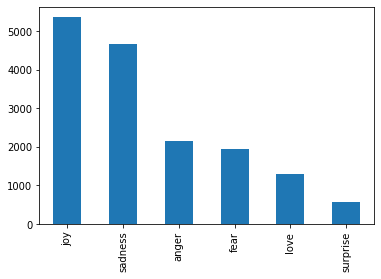

In [ ]:
df['Emotion'].value_counts().plot(kind="bar")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


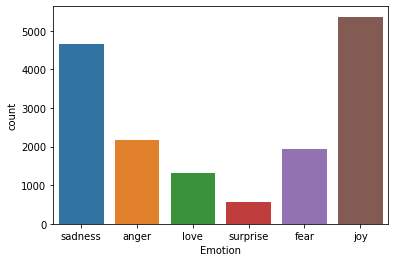

In [ ]:
sns.countplot(df['Emotion'])

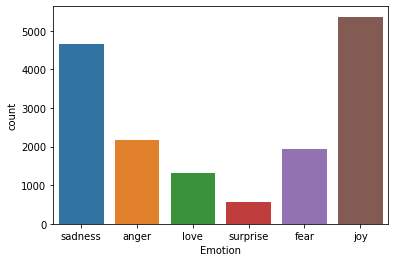

In [ ]:
sns.countplot(x='Emotion',data=df)

<function matplotlib.pyplot.show(*args, **kw)>

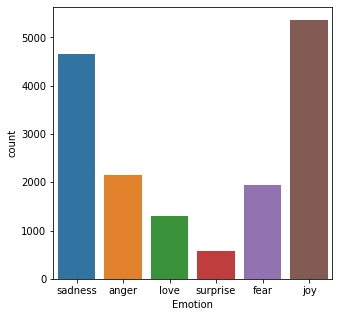

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='Emotion',data=df)
plt.show

In [ ]:
from textblob import TextBlob

In [ ]:
sns.catplot
sns.factorplot

<function seaborn.categorical.factorplot(*args, **kwargs)>

In [ ]:
#cleaing text

In [ ]:
df['Clean_Text']=df['Text'].apply(nfx.remove_stopwords)

In [ ]:
df['Clean_Text']=df['Clean_Text'].apply(nfx.remove_userhandles)

In [ ]:
df['Clean_Text']=df['Clean_Text'].apply(nfx.remove_punctuations)

In [ ]:
df.head()

,Text,Emotion,Clean_Text
0,i can go from feeling so hopeless to so damned...,sadness,feeling hopeless damned hopeful cares awake
1,im grabbing a minute to post i feel greedy wrong,anger,im grabbing minute post feel greedy wrong
2,i am ever feeling nostalgic about the fireplac...,love,feeling nostalgic fireplace know property
3,i am feeling grouchy,anger,feeling grouchy
4,ive been feeling a little burdened lately wasn...,sadness,ive feeling little burdened lately wasnt sure


In [ ]:
df[['Text','Clean_Text']]

,Text,Clean_Text
0,i can go from feeling so hopeless to so damned...,feeling hopeless damned hopeful cares awake
1,im grabbing a minute to post i feel greedy wrong,im grabbing minute post feel greedy wrong
2,i am ever feeling nostalgic about the fireplac...,feeling nostalgic fireplace know property
3,i am feeling grouchy,feeling grouchy
4,ive been feeling a little burdened lately wasn...,ive feeling little burdened lately wasnt sure
...,...,...
15994,i just had a very brief time in the beanbag an...,brief time beanbag said anna feel like beaten
15995,i am now turning and i feel pathetic that i am...,turning feel pathetic waiting tables subbing t...
15996,i feel strong and good overall,feel strong good overall
15997,i feel like this was such a rude comment and i...,feel like rude comment im glad


In [ ]:
from collections import Counter

In [ ]:
#creating tokens and counting
def extract_keywords(text,num=50):
  tokens=[tok for tok in text.split()]
  most_common_tokens=Counter(tokens).most_common(num)
  return dict(most_common_tokens)

In [ ]:
emotion_list=df['Emotion'].unique().tolist()

In [ ]:
emotion_list

['sadness', 'anger', 'love', 'surprise', 'fear', 'joy']

In [ ]:
df[df['Emotion']=='joy']

,Text,Emotion,Clean_Text
7,i have been with petronas for years i feel tha...,joy,petronas years feel petronas performed huge pr...
10,i do feel that running is a divine experience ...,joy,feel running divine experience expect type spi...
13,i have immense sympathy with the general point...,joy,immense sympathy general point possible proto ...
14,i do not feel reassured anxiety is on each side,joy,feel reassured anxiety
21,i have the feeling she was amused and delighted,joy,feeling amused delighted
...,...,...,...
15985,i had a horrible horrible horrible time and ho...,joy,horrible horrible horrible time honestly music...
15986,i feel energized but i find that i am much mor...,joy,feel energized find outgoing friendly
15989,i feel really glad that i dont look like the c...,joy,feel glad dont look like celebrities beautiful...
15992,i most days feel like if braeden and calvin ar...,joy,days feel like braeden calvin happy successful...


In [ ]:
df[df['Emotion']=='joy']['Clean_Text']

7        petronas years feel petronas performed huge pr...
10       feel running divine experience expect type spi...
13       immense sympathy general point possible proto ...
14                                  feel reassured anxiety
21                                feeling amused delighted
                               ...                        
15985    horrible horrible horrible time honestly music...
15986                feel energized find outgoing friendly
15989    feel glad dont look like celebrities beautiful...
15992    days feel like braeden calvin happy successful...
15996                             feel strong good overall
Name: Clean_Text, Length: 5362, dtype: object

In [ ]:
joy_list=df[df['Emotion']=='joy']['Clean_Text'].tolist()

In [ ]:
joy_docx=' '.join(joy_list)

In [ ]:
joy_docx

'petronas years feel petronas performed huge profit feel running divine experience expect type spiritual encounter immense sympathy general point possible proto writer trying find time write corners life sign agent let publishing contract feels little precious feel reassured anxiety feeling amused delighted able help chai lifeline support encouragement great feeling glad able help feel superior dead chicken grieving child giddy feeling elegant perfectly fitted pencil skirt imagine real life scenario emotionally connected feel totally accepted safe morally acceptable close prolonged physical contact sex expected subsequently sure feel content feeling need creative want know causing feel splendid self step away need need need protected feel safe small find season words plan share everyday life stories traveling adventures inspirations handmade creations hope feel inspired christmas trees got feeling festive sure spurring started book ive worn little concealer days im feeling brave dont w

In [ ]:
keyword_joy=extract_keywords(joy_docx)

In [ ]:
keyword_joy

In [ ]:
def plot_most_common_words(mydict,emotion_name):
  df_01=pd.DataFrame(mydict.items(),columns=['token','count'])
  plt.figure(figsize=(20,10))
  plt.title("plot of {} most common keywords".format(emotion_name))
  sns.barplot(x='token',y='count',data=df_01)
  plt.xticks(rotation=45)
  plt.show()



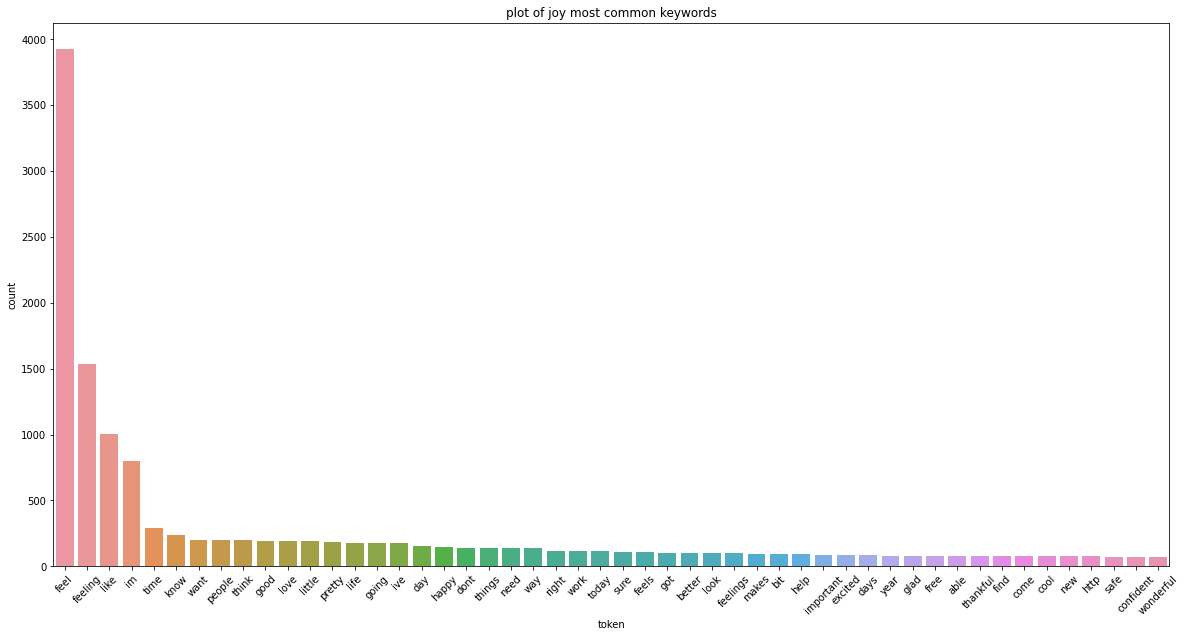

In [ ]:
plot_most_common_words(keyword_joy,"joy")

In [ ]:
surprise_list=df[df['Emotion']=='surprise']['Clean_Text'].tolist()
surprise_docx=' '.join(surprise_list)
keyword_surprise=extract_keywords(joy_docx)

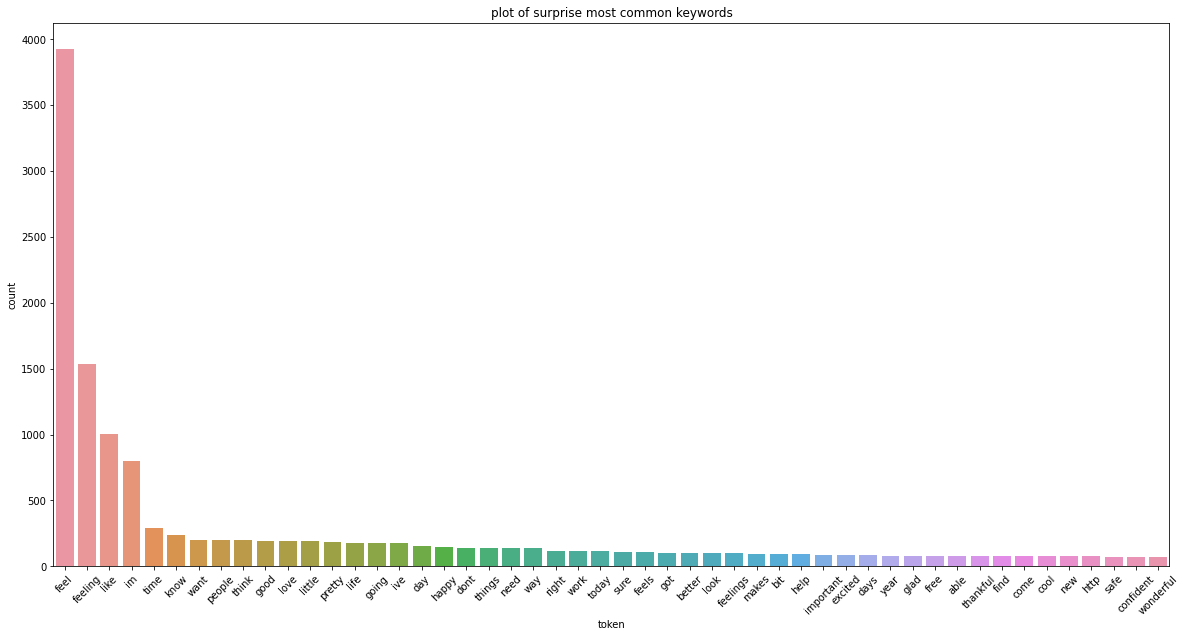

In [ ]:
plot_most_common_words(keyword_surprise,"surprise")

In [ ]:
 pip install wordcloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
xfeature=df['Clean_Text']
ylabels=df['Emotion']

In [ ]:
xfeature

In [ ]:
cv=CountVectorizer()
x=cv.fit_transform(xfeature)

In [ ]:
cv.get_feature_names()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, ylabels, test_size=0.3, random_state=42)


In [ ]:
nv_model=MultinomialNB()
nv_model.fit(x_train,y_train)

MultinomialNB()

In [ ]:
nv_model.score(x_test,y_test)

0.7670833333333333

In [ ]:
y_pred_for_nv=nv_model.predict(x_test)

In [ ]:
y_pred_for_nv

array(['sadness', 'anger', 'sadness', ..., 'joy', 'joy', 'love'],
      dtype='<U8')

In [ ]:
sample_text=['I hate coding']

In [ ]:
vect=cv.transform(sample_text).toarray()


In [ ]:
nv_model.predict(vect)

array(['sadness'], dtype='<U8')

In [ ]:
nv_model.predict_proba(vect)

array([[0.14714268, 0.12612764, 0.2044373 , 0.03135515, 0.48798427,
        0.00295297]])

In [ ]:
nv_model.classes_

array(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'], dtype='<U8')

In [ ]:
np.max(nv_model.predict_proba(vect))

0.48798427455646737

In [ ]:
def predict_emotion(sample_text,model):
  myvect=cv.transform(sample_text).toarray()
  prediction=model.predict(myvect)
  pred_proba=model.predict_proba(myvect)
  pred_percentage_for_all=dict(zip(model.classes_,pred_proba[0]))
  print("Prediction:{},Prediction Score:{}".format(prediction[0],np.max(pred_proba)))
  print(prediction[0])
  return pred_percentage_for_all

In [ ]:
predict_emotion(sample_text,nv_model)

Prediction:sadness,Prediction Score:0.48798427455646737
sadness


{'anger': 0.14714267599243303,
 'fear': 0.12612763606195576,
 'joy': 0.20443730036772242,
 'love': 0.031355146941945376,
 'sadness': 0.48798427455646737,
 'surprise': 0.002952966079475789}

In [ ]:
predict_emotion(["He hate running "],nv_model)

In [ ]:
print(classification_report(y_test,y_pred_for_nv))

In [ ]:
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
lr_model.score(x_test,y_test)

0.8797916666666666

In [ ]:
predict_emotion(sample_text,lr_model)

Prediction:sadness,Prediction Score:0.3766782003615969
sadness


{'anger': 0.17178482043800733,
 'fear': 0.13933171784717613,
 'joy': 0.2751127662103859,
 'love': 0.025429132028877973,
 'sadness': 0.3766782003615969,
 'surprise': 0.011663363113955686}

In [ ]:
import eli5

In [ ]:
eli5.show_weights(lr_model,top=20)

In [ ]:
class_names=ylabels.unique().tolist()

In [ ]:
feature_names=cv.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
eli5.show_weights(lr_model,feature_names=feature_names,target_names=class_names)

In [ ]:

from joblib import dump

In [ ]:
dump(nv_model,"nv_model.joblib")

['nv_model.joblib']

In [ ]:
import requests

In [ ]:
r = requests.post("https://0e0c-35-239-63-2.ngrok.io/", json = {"uname": "NAME", "prefs": [1]}, verify = False)

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [ ]:
r

<Response [404]>

In [ ]:
r.json

<bound method Response.json of <Response [404]>>